In [21]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [22]:
# Load the data - sklearn breast_cancer
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [23]:
type(df)

sklearn.utils._bunch.Bunch

In [24]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
df.data.shape

(569, 30)

In [26]:
df.target.shape

(569,)

In [27]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [28]:
df.target_names
# 0 - malignant, 1 - benign

array(['malignant', 'benign'], dtype='<U9')

In [29]:
import pandas as pd
pd.Series(df.target).value_counts()
# Class Distribution: 212 - Malignant, 357 - Benign

,count
1,357
0,212


In [30]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

### Problem Statement: Classification of Breast Cancer Tumors Using Deep Learning

#### **Objective:**
To develop a deep learning model that classifies breast cancer tumors as **malignant** or **benign** based on the diagnostic features provided in the Breast Cancer Wisconsin dataset.

#### **Dataset Description:**
The dataset, obtained from `sklearn.datasets.load_breast_cancer`, consists of 569 instances and 30 numerical features, including mean, standard error, and worst values of tumor characteristics like radius, texture, perimeter, area, and smoothness. It also includes a target variable with two classes:
- `0` for malignant tumors
- `1` for benign tumors

#### **Business Use Case:**
Accurately predicting whether a tumor is malignant or benign is critical in the medical domain for:
- Early detection and diagnosis of breast cancer.
- Assisting healthcare professionals in making informed decisions.
- Reducing unnecessary biopsies and medical interventions.

#### **Problem Type:**
This is a **binary classification problem** in the healthcare domain.

#### **Requirements:**
1. Build and preprocess the dataset for deep learning.
2. Train a neural network model to predict the target variable (malignant/benign).
3. Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.
4. Visualize the training and validation performance to ensure model optimization.

#### **Input Features:**
The model will use the following features:
- Mean Radius, Texture, Perimeter, Area, Smoothness, etc.
- Standard Error of these features.
- Worst values of these features.

#### **Target Variable:**
- Malignant (`0`)
- Benign (`1`)

#### **Key Tasks:**
1. **Data Preparation:**
   - Load the data using `load_breast_cancer()`.
   - Split the dataset into training, validation, and test sets.
   - Normalize the feature values to ensure efficient training.
2. **Model Development:**
   - Design a feedforward neural network using frameworks like TensorFlow or PyTorch.
   - Include essential layers such as input, hidden, and output layers.
   - Use an appropriate activation function for the output layer (e.g., sigmoid for binary classification).
3. **Training and Optimization:**
   - Train the model using a suitable optimizer (e.g., Adam) and loss function (e.g., binary cross-entropy).
   - Tune hyperparameters like learning rate, number of layers, and neurons per layer.
4. **Model Evaluation:**
   - Evaluate performance on the test set.
   - Compute evaluation metrics (accuracy, confusion matrix).
5. **Deployment (Optional):**
   - Develop an API for prediction using the trained model.

#### **Expected Outcomes:**
1. A well-trained deep learning model capable of classifying tumors with high accuracy.
2. Insight into the features most relevant to the classification decision (e.g., feature importance analysis).
3. Deployment-ready architecture for potential integration into clinical systems.


In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.33, random_state=42)
# Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(381, 30) (188, 30) (381,) (188,)


In [32]:
# Lets apply StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Lets implement ML model - Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on X_train and X_test
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print accuracy on Train and Test data
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.9868766404199475
Test Accuracy:  0.9787234042553191


In [35]:
# Now all the Tensorflow stuff
# Build the model

# Way1
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape=(30,)),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# Way2
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(30,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [36]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
# Train the model for 100 epochs i.e. 100 times
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6329 - loss: 0.6203 - val_accuracy: 0.6915 - val_loss: 0.6279
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6799 - loss: 0.5793 - val_accuracy: 0.7234 - val_loss: 0.5736
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7338 - loss: 0.5418 - val_accuracy: 0.7340 - val_loss: 0.5259
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7477 - loss: 0.4883 - val_accuracy: 0.7660 - val_loss: 0.4850
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7758 - loss: 0.4815 - val_accuracy: 0.7979 - val_loss: 0.4503
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8198 - loss: 0.4312 - val_accuracy: 0.8085 - val_loss: 0.4196
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8494 - loss: 0.3832 - val_accuracy: 0.8351 - val_loss: 0.3935
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8362 - loss: 0.3851 - val_accuracy: 0.8617 - 

In [38]:
# Evaluate the model - evaluate() returns loss and accuracy
print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0836 
Train Score:  [0.09208980202674866, 0.9816272854804993]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9844 - loss: 0.0806 
Test Score:  [0.07983820885419846, 0.9840425252914429]


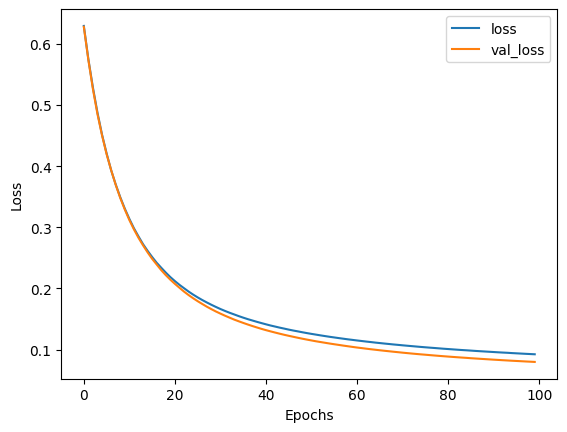

In [39]:
# Plot the loss function
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

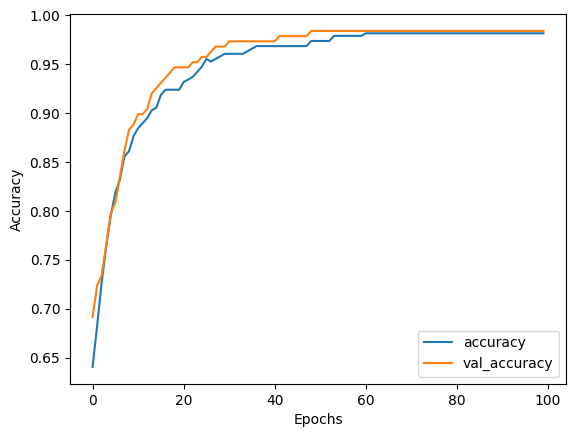

In [40]:
# Plot the accuracy function
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [41]:
# Make predictions
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [43]:
print(y_pred)

[[7.9168206e-01]
 [1.3670315e-03]
 [3.8464755e-02]
 [9.8512596e-01]
 [9.9735302e-01]
 [3.0559309e-07]
 [4.9586224e-06]
 [1.1785419e-01]
 [6.3171697e-01]
 [9.8970056e-01]
 [9.0062696e-01]
 [7.3125727e-02]
 [9.6791941e-01]
 [1.4822419e-01]
 [9.9120432e-01]
 [8.2936939e-03]
 [9.8351842e-01]
 [9.9892819e-01]
 [9.9986088e-01]
 [3.3492834e-04]
 [8.2786733e-01]
 [9.5585853e-01]
 [1.1096614e-05]
 [9.9885929e-01]
 [9.8341799e-01]
 [9.7073895e-01]
 [9.8707563e-01]
 [9.7177565e-01]
 [9.7582734e-01]
 [1.9686508e-04]
 [9.8363292e-01]
 [9.9731439e-01]
 [9.5102865e-01]
 [9.7054565e-01]
 [9.9532646e-01]
 [9.7534680e-01]
 [2.3867023e-01]
 [9.8779422e-01]
 [4.7592097e-03]
 [8.0454952e-01]
 [9.9395895e-01]
 [1.1945548e-02]
 [9.7574610e-01]
 [9.8833239e-01]
 [9.3809795e-01]
 [9.1532278e-01]
 [9.8174167e-01]
 [9.9250686e-01]
 [8.8231260e-01]
 [9.9494570e-01]
 [4.9386825e-03]
 [2.8585497e-05]
 [6.0042590e-01]
 [9.5031601e-01]
 [9.9146599e-01]
 [9.7554970e-01]
 [9.9552333e-01]
 [1.8233030e-07]
 [2.4246298e-0

In [44]:
7.9168206e-01

0.79168206

In [45]:
6.0437424e-03

0.0060437424

In [46]:
import numpy as np
y_pred = np.round(y_pred)

In [48]:
y_pred = y_pred.flatten()
print(y_pred)

[1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.]


In [49]:
model.save("linearclassifier.keras")

# Happy Learning